In [ ]:
total number of countries per population data = 3220

top data sets
 - Food deserts 
 - US McDonalds data, US Starbucks data, Dairy Queen, fast food location data
 - 




In [1]:
#Priya Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

desert = "../Priya's Resources/Food Deserts/food_access_research_atlas.csv"
variable = "../Priya's Resources/Food Deserts/food_access_variable_lookup.csv"
farmers_market = "../Priya's Resources/Farmers Markets/farmers_markets_from_usda.csv"
county_info = "../Priya's Resources/Farmers Markets/wiki_county_info.csv" 


desert_df = pd.read_csv(desert)
desert_var = pd.read_csv(variable)
farmers_df = pd.read_csv(farmers_market)
county_df = pd.read_csv(county_info)

In [2]:
uscitiesdata = "./uscities.csv"
uscities = pd.read_csv(uscitiesdata)
uscities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [3]:
state = "CA"
county = "Santa Clara"

county_info = desert_df.loc[(desert_df["State"]== "California") & (desert_df["County"]== county) ,:]
# county_info["POP2010"].sum()
# county_info["OHU2010"].sum()
county_info2 = desert_df.loc[(desert_df["State"]== "California") & (desert_df["County"]== county) & (desert_df["LAPOP1_10"]!= 0) ,:]
l = county_info2["LAPOP1_10"].sum()
p = county_info["POP2010"].sum()
l/p

0.08307530035824817

In [4]:
desert_df.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [5]:
l

148010.44428087

In [6]:
desertdf1 = desert_df
desertdf1["State.County"] = desertdf1["State"] + "-"+desertdf1["County"]
desertdf2 = desertdf1.groupby(["State.County"]).sum().reset_index()

In [7]:
county_info2["POP2010"].sum()

553073

In [8]:
desertdf2["State.County"].value_counts()

Minnesota-Ramsey           1
New York-Seneca            1
Virginia-Pulaski           1
Texas-Stephens             1
Michigan-Eaton             1
                          ..
Texas-San Patricio         1
Tennessee-Crockett         1
Missouri-St. Louis         1
Texas-Lynn                 1
Alaska-Northwest Arctic    1
Name: State.County, Length: 3141, dtype: int64

In [9]:
desertdf2

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,Alabama-Autauga,12012247403,7,54571,20221,0,455,0.128537,2,2,...,6546,42855,9643,474,32,232,1335,1310,1081,2682
1,Alabama-Baldwin,31093340873,14,182265,73180,0,2307,0.410627,3,3,...,30568,156153,17105,1348,89,1216,6354,7992,2242,6471
2,Alabama-Barbour,9053554500,2,27457,9820,0,3193,0.797355,3,3,...,3909,13180,12875,107,29,114,1152,1387,802,2097
3,Alabama-Bibb,4028040010,0,22915,7953,0,2224,0.262514,0,0,...,2906,17381,5047,22,13,64,388,406,299,1125
4,Alabama-Blount,9081453506,1,57322,21578,0,489,0.072488,0,0,...,8439,53068,761,117,38,307,3031,4626,823,2900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming-Sweetwater,672455650809,6,43806,16475,0,679,0.205299,0,0,...,3643,38748,438,336,42,423,3819,6689,628,835
3137,Wyoming-Teton,224159870803,1,21294,8973,0,271,0.071962,0,0,...,2098,18821,49,235,15,111,2063,3191,143,128
3138,Wyoming-Uinta,168125925900,0,21118,7668,0,270,0.035900,0,0,...,1874,19514,55,61,36,168,1284,1855,264,621
3139,Wyoming-Washakie,168129000803,2,8533,3492,0,140,0.049607,0,1,...,1508,7795,22,48,1,93,574,1162,252,337


In [10]:
desertdf2

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,Alabama-Autauga,12012247403,7,54571,20221,0,455,0.128537,2,2,...,6546,42855,9643,474,32,232,1335,1310,1081,2682
1,Alabama-Baldwin,31093340873,14,182265,73180,0,2307,0.410627,3,3,...,30568,156153,17105,1348,89,1216,6354,7992,2242,6471
2,Alabama-Barbour,9053554500,2,27457,9820,0,3193,0.797355,3,3,...,3909,13180,12875,107,29,114,1152,1387,802,2097
3,Alabama-Bibb,4028040010,0,22915,7953,0,2224,0.262514,0,0,...,2906,17381,5047,22,13,64,388,406,299,1125
4,Alabama-Blount,9081453506,1,57322,21578,0,489,0.072488,0,0,...,8439,53068,761,117,38,307,3031,4626,823,2900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming-Sweetwater,672455650809,6,43806,16475,0,679,0.205299,0,0,...,3643,38748,438,336,42,423,3819,6689,628,835
3137,Wyoming-Teton,224159870803,1,21294,8973,0,271,0.071962,0,0,...,2098,18821,49,235,15,111,2063,3191,143,128
3138,Wyoming-Uinta,168125925900,0,21118,7668,0,270,0.035900,0,0,...,1874,19514,55,61,36,168,1284,1855,264,621
3139,Wyoming-Washakie,168129000803,2,8533,3492,0,140,0.049607,0,1,...,1508,7795,22,48,1,93,574,1162,252,337


In [12]:
desertdf3 = desertdf2
desertdf3["Desert vs POP"] = (desertdf2["LAPOP1_10"]/desertdf2["POP2010"])*100
desertdf3["Desert vs OHU"] = (desertdf2["LAPOP1_10"]/desertdf2["OHU2010"])*100
desertdf3

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU
0,Alabama-Autauga,12012247403,7,54571,20221,0,455,0.128537,2,2,...,9643,474,32,232,1335,1310,1081,2682,33.154352,89.474612
1,Alabama-Baldwin,31093340873,14,182265,73180,0,2307,0.410627,3,3,...,17105,1348,89,1216,6354,7992,2242,6471,25.457631,63.405781
2,Alabama-Barbour,9053554500,2,27457,9820,0,3193,0.797355,3,3,...,12875,107,29,114,1152,1387,802,2097,24.343430,68.064926
3,Alabama-Bibb,4028040010,0,22915,7953,0,2224,0.262514,0,0,...,5047,22,13,64,388,406,299,1125,1.290048,3.717018
4,Alabama-Blount,9081453506,1,57322,21578,0,489,0.072488,0,0,...,761,117,38,307,3031,4626,823,2900,10.215867,27.138470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming-Sweetwater,672455650809,6,43806,16475,0,679,0.205299,0,0,...,438,336,42,423,3819,6689,628,835,21.458798,57.057608
3137,Wyoming-Teton,224159870803,1,21294,8973,0,271,0.071962,0,0,...,49,235,15,111,2063,3191,143,128,17.429217,41.361613
3138,Wyoming-Uinta,168125925900,0,21118,7668,0,270,0.035900,0,0,...,55,61,36,168,1284,1855,264,621,3.592643,9.894292
3139,Wyoming-Washakie,168129000803,2,8533,3492,0,140,0.049607,0,1,...,22,48,1,93,574,1162,252,337,12.390091,30.276245


In [15]:
new = desertdf3["State.County"].str.split("-", n = 1, expand = True) 
desertdf4 = desertdf3 
# making separate first name column from new data frame 
desertdf4["State"]= new[0] 
  
desertdf4 

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU,State
0,Alabama-Autauga,12012247403,7,54571,20221,0,455,0.128537,2,2,...,474,32,232,1335,1310,1081,2682,33.154352,89.474612,Alabama
1,Alabama-Baldwin,31093340873,14,182265,73180,0,2307,0.410627,3,3,...,1348,89,1216,6354,7992,2242,6471,25.457631,63.405781,Alabama
2,Alabama-Barbour,9053554500,2,27457,9820,0,3193,0.797355,3,3,...,107,29,114,1152,1387,802,2097,24.343430,68.064926,Alabama
3,Alabama-Bibb,4028040010,0,22915,7953,0,2224,0.262514,0,0,...,22,13,64,388,406,299,1125,1.290048,3.717018,Alabama
4,Alabama-Blount,9081453506,1,57322,21578,0,489,0.072488,0,0,...,117,38,307,3031,4626,823,2900,10.215867,27.138470,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Wyoming-Sweetwater,672455650809,6,43806,16475,0,679,0.205299,0,0,...,336,42,423,3819,6689,628,835,21.458798,57.057608,Wyoming
3137,Wyoming-Teton,224159870803,1,21294,8973,0,271,0.071962,0,0,...,235,15,111,2063,3191,143,128,17.429217,41.361613,Wyoming
3138,Wyoming-Uinta,168125925900,0,21118,7668,0,270,0.035900,0,0,...,61,36,168,1284,1855,264,621,3.592643,9.894292,Wyoming
3139,Wyoming-Washakie,168129000803,2,8533,3492,0,140,0.049607,0,1,...,48,1,93,574,1162,252,337,12.390091,30.276245,Wyoming


In [13]:
import scipy.cluster.hierarchy as shc

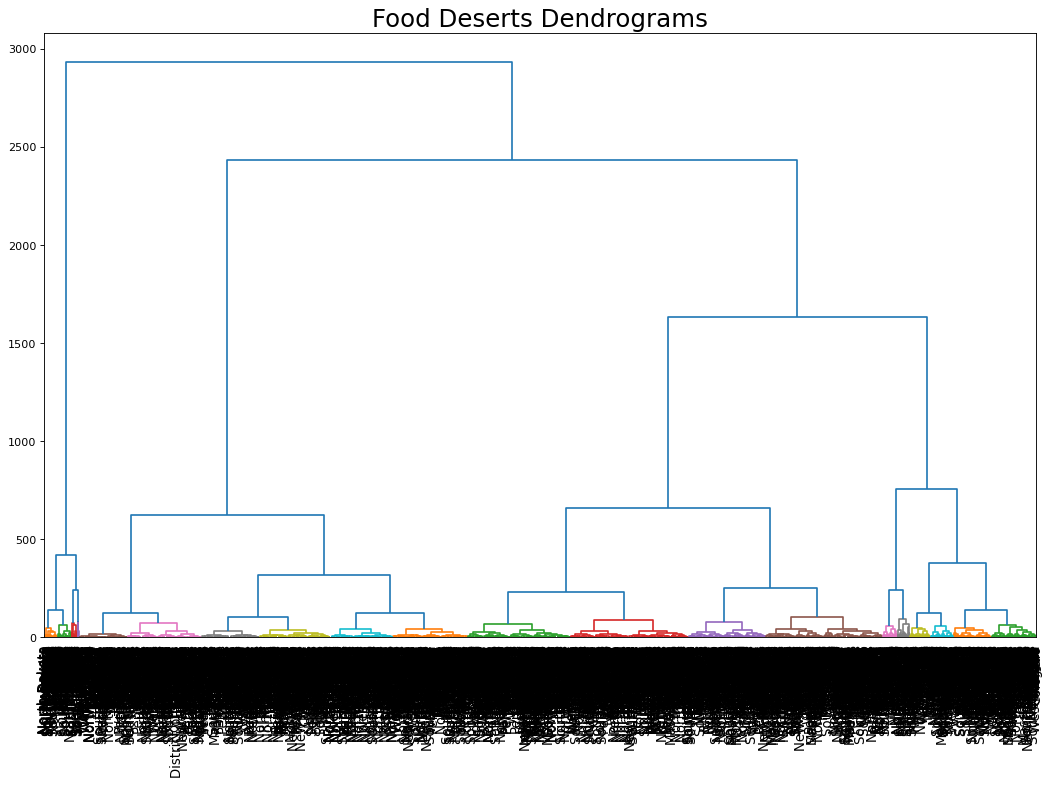

In [16]:
# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("Food Deserts Dendrograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(desertdf4[['Desert vs POP','Desert vs OHU']], method='ward'), labels=desertdf4.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

In [18]:
desertdf5 = desert_df.groupby(["State"]).sum().reset_index()
desertdf5


,State,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,Alabama,1268834272385,644,4779736,1883791,4,115816,29.739938,246,387,...,657792,3275394,1251311,53595,3057,28218,168161,185602,119315,291592
1,Alaska,351542086585,85,710231,258058,1,26352,7.394096,34,48,...,54938,473576,23263,38135,7409,104871,62977,39249,24148,26130
2,Arizona,6126991377194,1293,6392017,2380990,16,139384,31.001931,258,564,...,881831,4667121,259008,176695,12648,296529,980016,1895149,163479,323640
3,Arkansas,3484080853747,335,2915918,1147084,1,78931,18.806666,177,247,...,419981,2245229,449895,36102,5863,22248,156581,186050,72003,167466
4,California,48705669364530,7352,37253956,12577498,67,819816,185.229939,542,2195,...,4246514,21453934,2299072,4861007,144386,362801,8132756,14013719,984852,1102588
5,Colorado,10050504751914,977,5029196,1972868,13,115878,32.019217,180,419,...,549625,4089202,201737,139028,6623,56010,536596,1038687,114782,171194
6,Connecticut,7492871977935,706,3574097,1371087,8,118152,28.011591,70,203,...,506559,2772410,362296,135565,1428,11256,291142,479087,123437,157477
7,Delaware,2180705461177,170,897934,342297,0,24413,5.174522,27,55,...,129277,618617,191814,28549,400,4181,54373,73221,21841,43114
8,District of Columbia,1969180078485,179,601723,266707,3,40021,10.380114,6,52,...,68809,231471,305125,21056,302,2079,41690,54749,96855,37777
9,Florida,50870329497024,3627,18801310,7420802,22,421709,98.609079,582,1301,...,3259602,14109162,2999862,454821,12286,71458,1153721,4223806,512040,1032766


In [19]:
desertdf5["Desert vs POP"] = (desertdf5["LAPOP1_10"]/desertdf5["POP2010"])*100
desertdf5["Desert vs OHU"] = (desertdf5["LAPOP1_10"]/desertdf5["OHU2010"])*100
desertdf5

,State,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU
0,Alabama,1268834272385,644,4779736,1883791,4,115816,29.739938,246,387,...,1251311,53595,3057,28218,168161,185602,119315,291592,24.236327,61.494744
1,Alaska,351542086585,85,710231,258058,1,26352,7.394096,34,48,...,23263,38135,7409,104871,62977,39249,24148,26130,34.159455,94.014152
2,Arizona,6126991377194,1293,6392017,2380990,16,139384,31.001931,258,564,...,259008,176695,12648,296529,980016,1895149,163479,323640,26.207767,70.357494
3,Arkansas,3484080853747,335,2915918,1147084,1,78931,18.806666,177,247,...,449895,36102,5863,22248,156581,186050,72003,167466,23.963979,60.917070
4,California,48705669364530,7352,37253956,12577498,67,819816,185.229939,542,2195,...,2299072,4861007,144386,362801,8132756,14013719,984852,1102588,13.386560,39.650359
5,Colorado,10050504751914,977,5029196,1972868,13,115878,32.019217,180,419,...,201737,139028,6623,56010,536596,1038687,114782,171194,22.635397,57.701705
6,Connecticut,7492871977935,706,3574097,1371087,8,118152,28.011591,70,203,...,362296,135565,1428,11256,291142,479087,123437,157477,29.804450,77.693098
7,Delaware,2180705461177,170,897934,342297,0,24413,5.174522,27,55,...,191814,28549,400,4181,54373,73221,21841,43114,25.435873,66.724905
8,District of Columbia,1969180078485,179,601723,266707,3,40021,10.380114,6,52,...,305125,21056,302,2079,41690,54749,96855,37777,2.118816,4.780304
9,Florida,50870329497024,3627,18801310,7420802,22,421709,98.609079,582,1301,...,2999862,454821,12286,71458,1153721,4223806,512040,1032766,25.695831,65.102841


In [35]:
desertdf5['MedianFamilyIncome'].head(5)

0     62676154
1     13381966
2     92612299
3     35122700
4    604648002
Name: MedianFamilyIncome, dtype: int64

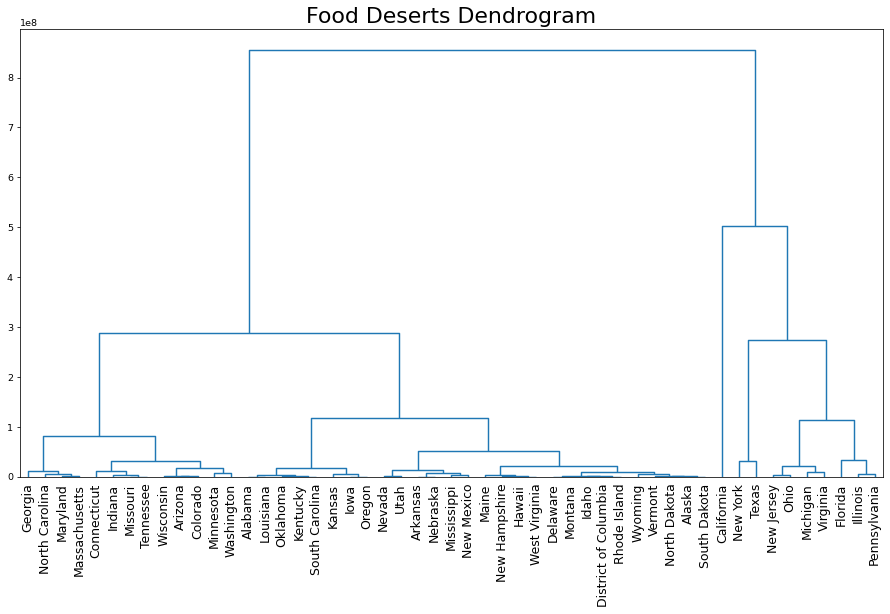

In [205]:
# Plot
plt.figure(figsize=(13, 9), dpi= 69)  
plt.title("Food Deserts Dendrogram", fontsize=23)  
dend = shc.dendrogram(shc.linkage(desertdf5[['MedianFamilyIncome','Desert vs POP']], method='ward'), labels=desertdf5.State.values, color_threshold=100)  
plt.xticks(fontsize=13)
plt.tight_layout()
plt.savefig("./dendro1.png",facecolor='w')
plt.show()

In [39]:
import joypy

In [37]:
!pip install joypy

<Figure size 1280x800 with 0 Axes>

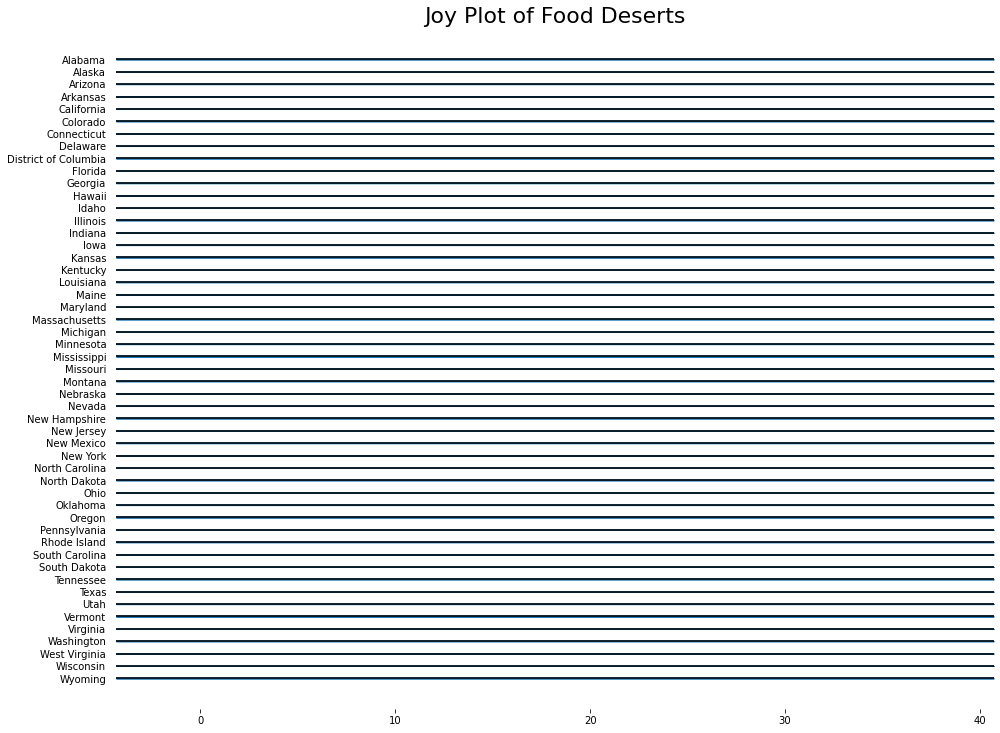

In [41]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(desertdf5, column=['Desert vs POP'], by="State", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of Food Deserts', fontsize=22)
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull


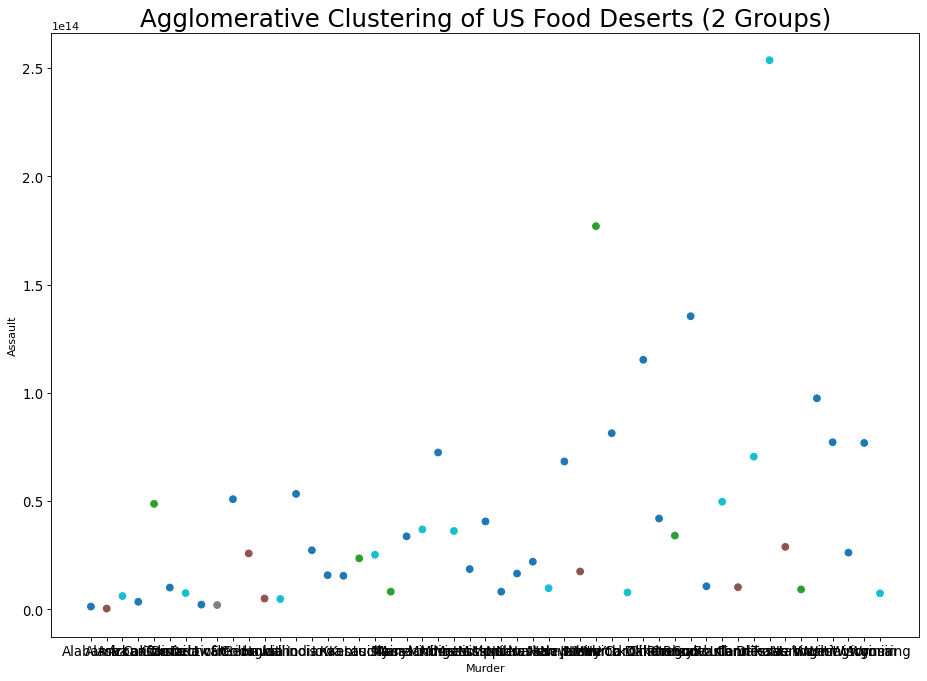

In [25]:

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(desertdf5[['Desert vs POP','Desert vs OHU']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(desertdf5.iloc[:,0], desertdf5.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(desertdf5.loc[cluster.labels_ == 0, 'Desert vs POP'], desertdf5.loc[cluster.labels_ == 0, 'Desert vs OHU'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(desertdf5.loc[cluster.labels_ == 1, 'Desert vs POP'], desertdf5.loc[cluster.labels_ == 1, 'Desert vs OHU'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of US Food Deserts (2 Groups)', fontsize=22)
plt.show()

In [106]:
desertdf3.loc[desertdf3["State.County"]  == "California-Santa Clara",:]

,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU
226,California-Santa Clara,2263808482024,363,1781642,604204,1,30350,6.454838,7,74,...,46428,570524,7060,12960,308054,479210,31581,30922,8.30753,24.496767


In [94]:
#Population count beyond 1 mile for urban areas or 20 miles for rural areas from supermarket

#Occupied housing unit count from 2010 census
desertdf3["Desert vs OHU"].describe()

count    3141.000000
mean       64.853411
std        51.876784
min         0.000000
25%        29.893006
50%        55.140337
75%        84.048886
max       410.624028
Name: Desert vs OHU, dtype: float64

In [95]:
#Population count from 2010 census

desertdf3["Desert vs POP"].describe()

count    3141.000000
mean       25.203356
std        20.131432
min         0.000000
25%        11.830846
50%        21.586016
75%        32.665332
max       100.000001
Name: Desert vs POP, dtype: float64

In [117]:
# county vs US

desertdf4  = desertdf3.sort_values(["Desert vs POP"]).reset_index()
desertdf4.loc[desertdf4["State.County"]  == "California-Santa Clara",:]


# how to get the index


,index,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU
524,226,California-Santa Clara,2263808482024,363,1781642,604204,1,30350,6.454838,7,...,46428,570524,7060,12960,308054,479210,31581,30922,8.30753,24.496767


In [ ]:
#county vs state

In [119]:
desertdf5  = desertdf3.sort_values(["Desert vs OHU"]).reset_index()
desertdf5.loc[desertdf5["State.County"]  == "California-Santa Clara",:]

#congrats you live in county ranked # _________

,index,State.County,CensusTract,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Desert vs POP,Desert vs OHU
609,226,California-Santa Clara,2263808482024,363,1781642,604204,1,30350,6.454838,7,...,46428,570524,7060,12960,308054,479210,31581,30922,8.30753,24.496767


In [44]:
farmers_df.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [45]:
farmers_df["State"].value_counts()

California              760
New York                673
Michigan                343
Illinois                338
Ohio                    336
Massachusetts           326
Pennsylvania            312
Wisconsin               311
Florida                 264
Virginia                263
Missouri                256
North Carolina          255
Texas                   236
Iowa                    227
Minnesota               203
Indiana                 201
Washington              176
Georgia                 169
Maryland                165
Colorado                161
Oregon                  160
Connecticut             158
New Jersey              156
Alabama                 140
Kentucky                140
South Carolina          133
Tennessee               133
Kansas                  120
Arkansas                111
Nebraska                105
New Hampshire            96
Maine                    96
Hawaii                   96
West Virginia            94
Arizona                  93
Vermont             

In [47]:
farmers1 = farmers_df.groupby(["State"]).count().reset_index()
farmers1.head()

,State,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,Alabama,140,140,40,38,9,1,5,135,138,...,80,80,80,80,80,80,80,80,80,140
1,Alaska,37,37,21,17,5,0,1,37,37,...,25,25,25,25,25,25,25,25,25,37
2,Arizona,93,93,69,54,24,3,15,92,93,...,66,66,66,66,66,66,66,66,66,93
3,Arkansas,111,111,36,58,5,1,9,105,110,...,65,65,65,65,65,65,65,65,65,111
4,California,760,760,500,317,107,9,104,751,753,...,459,459,459,459,459,459,459,459,459,760


In [52]:
import functools

In [48]:
fasts = "./faststates.csv"
sbd = "./sbdstates.csv"

fast = pd.read_csv(fasts)
sb = pd.read_csv(sbd)

In [59]:
farmer = farmers1[['State','FMID']]
farmer.head()

,State,FMID
0,Alabama,140
1,Alaska,37
2,Arizona,93
3,Arkansas,111
4,California,760


In [61]:
fasts = fast[['State',"keys"]]
fasts.head()

,State,keys
0,Alabama,236
1,Alaska,14
2,Arizona,208
3,Arkansas,151
4,California,676


In [63]:
sbs = sb[['State',"Brand"]]
sbs.head()

,State,Brand
0,Alaska,49
1,Alabama,85
2,Arkansas,55
3,Arizona,488
4,California,2821


In [62]:
sb.head()

,State/Province,Brand,Store Number,Store Name,Ownership Type,Street Address,City,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,State,Abbrev,Code
0,AK,49,49,49,49,49,49,49,49,41,49,49,49,Alaska,Alaska,AK
1,AL,85,85,85,85,85,85,85,85,83,85,85,85,Alabama,Ala.,AL
2,AR,55,55,55,55,55,55,55,55,53,55,55,55,Arkansas,Ark.,AR
3,AZ,488,488,488,488,488,488,488,488,474,488,488,488,Arizona,Ariz.,AZ
4,CA,2821,2821,2821,2821,2821,2821,2821,2821,2767,2821,2821,2821,California,Calif.,CA


In [73]:
import seaborn as sns

In [64]:
dfs = [fasts,sbs,farmer ]

In [66]:
counts = functools.reduce(lambda left,right: pd.merge(left,right,on='State'), dfs)
counts.head()

,State,keys,Brand,FMID
0,Alabama,236,85,140
1,Alaska,14,49,37
2,Arizona,208,488,93
3,Arkansas,151,55,111
4,California,676,2821,760


In [71]:
counts1 = counts.rename(columns={'keys':'FastFood','Brand':'Sbux','FMID':'FarmersMkt'})
counts1.head(5)

,State,FastFood,Sbux,FarmersMkt
0,Alabama,236,85,140
1,Alaska,14,49,37
2,Arizona,208,488,93
3,Arkansas,151,55,111
4,California,676,2821,760


C:\Users\ystil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ystil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ystil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


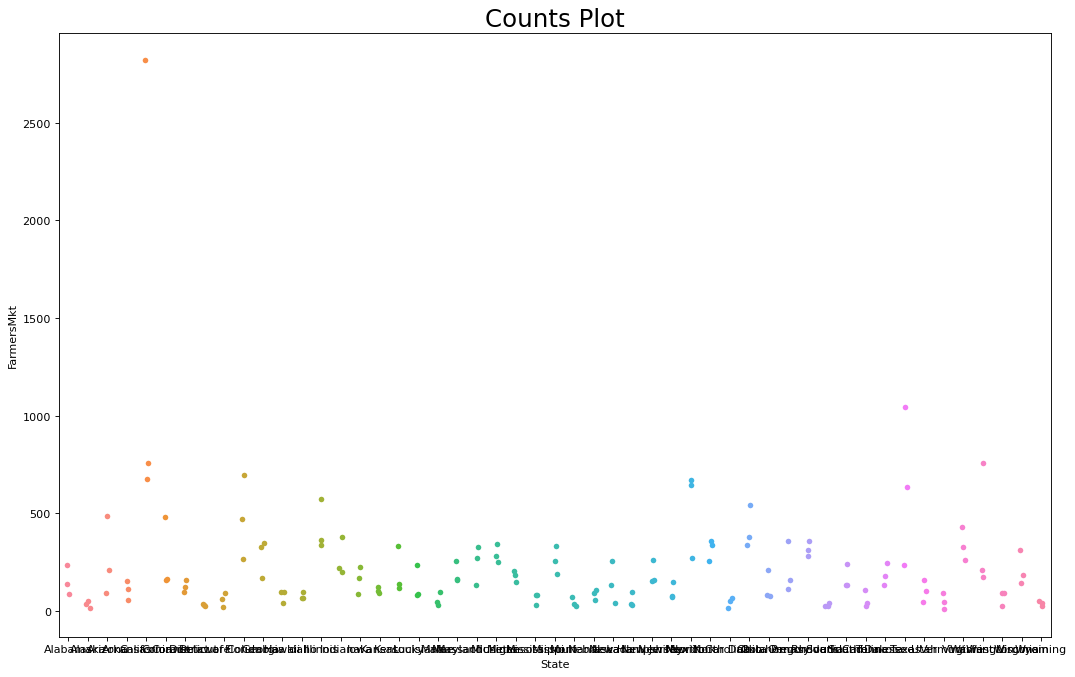

In [85]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(counts1.State, counts1.FastFood, ax=ax)
sns.stripplot(counts1.State, counts1.Sbux, ax=ax)
sns.stripplot(counts1.State, counts1.FarmersMkt, ax=ax)


# Decorations
plt.title('Counts Plot', fontsize=22)
plt.show()

In [87]:
deserts = desertdf5[['State','POP2010']]
deserts.head()

,State,POP2010
0,Alabama,4779736
1,Alaska,710231
2,Arizona,6392017
3,Arkansas,2915918
4,California,37253956


In [89]:
counts2 = pd.merge(counts1, deserts, on='State',how='left')
counts2.head()

,State,FastFood,Sbux,FarmersMkt,POP2010
0,Alabama,236,85,140,4779736
1,Alaska,14,49,37,710231
2,Arizona,208,488,93,6392017
3,Arkansas,151,55,111,2915918
4,California,676,2821,760,37253956


In [90]:
counts2['POP2010'].sum()

308745538

In [96]:
counts2["FFpt"]=(counts2['FastFood']/counts2['POP2010'])*100000
counts2["SBpt"]=(counts2['Sbux']/counts2['POP2010'])*100000
counts2["FMpt"]=(counts2['FarmersMkt']/counts2['POP2010'])*100000

In [97]:
counts2.describe()

,FastFood,Sbux,FarmersMkt,POP2010,FFpt,SBpt,FMpt
count,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,195.980392,266.823529,171.725490,6.053834e+06,4.158828,4.152648,4.196292
std,154.768406,427.834580,144.007511,6.823984e+06,2.073878,2.769067,2.639580
min,14.000000,8.000000,36.000000,5.636260e+05,1.388165,1.078423,0.938535
25%,92.500000,56.500000,77.500000,1.696962e+06,2.744261,2.728685,2.625800
50%,158.000000,123.000000,133.000000,4.339367e+06,3.563736,3.328499,3.472992
75%,260.000000,332.000000,231.500000,6.636084e+06,5.203184,4.221773,5.054306
max,676.000000,2821.000000,760.000000,3.725396e+07,12.896411,15.123238,14.702569


In [99]:
x = counts2['POP2010']
y1 = counts2['FFpt']
xy_name = counts2['State']

fig = plt.figure(figsize=(8,5))
plt.scatter(x, y1, marker='s', s=50)

for x, y, z in zip(x, y1, xy_name):
    plt.annotate(
        '(%s)' % (z), 
        xy=(x, y), 
        xytext=(0, -10),
        textcoords='offset points', 
        ha='center', 
        va='top')

plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

ValueError: Image size of -549703161x3526 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x360 with 1 Axes>

C:\Users\ystil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: s must be a scalar, or the same size as x and y

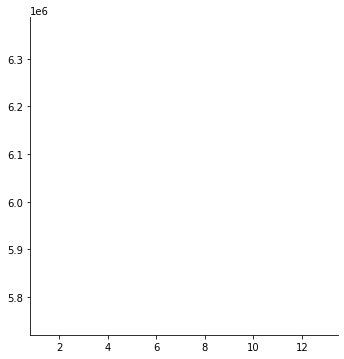

In [100]:
#sizes = [10, 40, 70, 100, 130] 
marker_size = pd.cut(5*counts2['POP2010'], [0, 250000, 500000, 1000000, 2000000, 5000000, 10000000]) 
sns.lmplot('FFpt', 'POP2010', data=counts2, hue='State', fit_reg=False, scatter_kws={'s':marker_size})
plt.ylim((0, 500000))

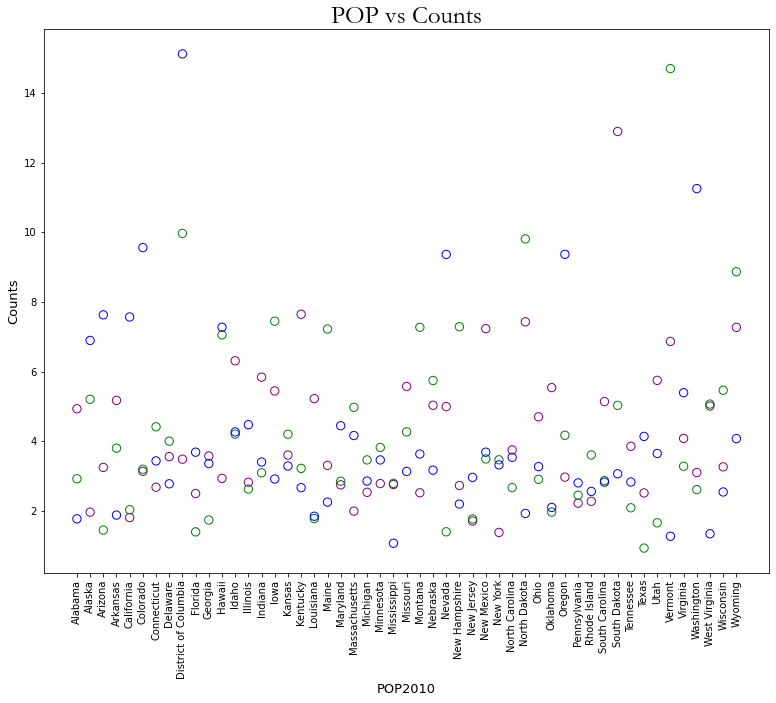

In [111]:

fig2, ax2 = plt.subplots(figsize=(13, 10))
colors = ["chocolate","magenta","pink","violet","blue","indigo","purple","red","brown","yellow","green"]
plt.scatter(counts2['State'],counts2['FFpt'],s=69, color='purple',marker="o",facecolors='none',edgecolors='purple')
plt.scatter(counts2['State'],counts2['FMpt'],s=69, color='purple',marker="o",facecolors='none',edgecolors='green')
plt.scatter(counts2['State'],counts2['SBpt'],s=69, color='purple',marker="o",facecolors='none',edgecolors='blue')
plt.title('POP vs Counts',font='Garamond',fontsize =25)
plt.xlabel('POP2010',fontsize =13)
plt.ylabel('Counts',fontsize =13)
plt.xticks(rotation=90)

#plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()

In [ ]:
plt.scatter(counts2['POP2010'],counts2['FFpt'],s=69, color='purple',marker="o",facecolors='none',edgecolors=colors)

In [142]:
counts2.loc[counts2['State']=='District of Columbia']

,State,FastFood,Sbux,FarmersMkt,POP2010,FFpt,SBpt,FMpt
8,District of Columbia,21,91,60,601723,3.489978,15.123238,9.971366


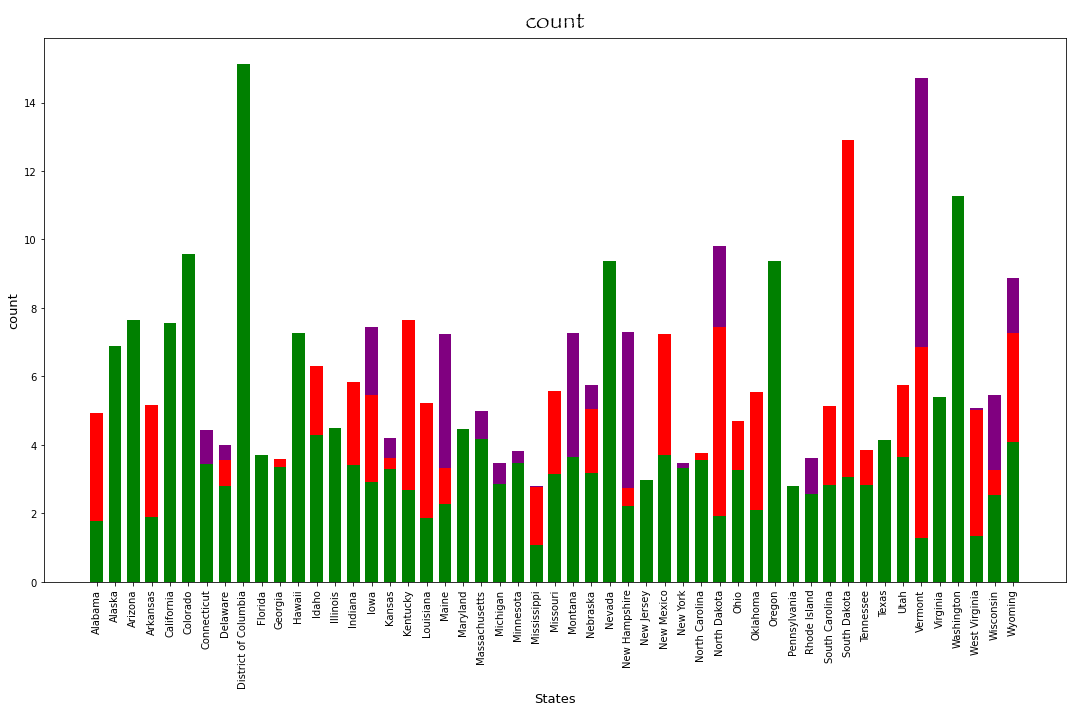

In [156]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set the x_axis 
#x_axis = np.arange(len(totalmeasures))
fig2, ax2 = plt.subplots(figsize=(15, 10))
colors = ["chocolate","magenta","pink","violet","blue","indigo","purple","red","brown","yellow","green"]
plt.bar(counts2['State'], counts2['FMpt'], width = 0.69, color='purple')
plt.bar(counts2['State'], counts2['FFpt'], width = 0.69, color='red')
plt.bar(counts2['State'], counts2['SBpt'], width = 0.69, color='green')


# tick marks
ticks = counts2['State']
plt.xticks(ticks,rotation=90)
# Set labels for axes
plt.xlabel("States",fontsize = 13)
plt.ylabel("count",fontsize = 13)
plt.title("count",font='Papyrus',fontsize=25,ha='center')
plt.tight_layout()

# plt.savefig("../Images/Mice.png", bbox_inches = "tight")
plt.show()

In [140]:
counts3 = counts2.set_index('State')
counts4 = counts3.drop(columns=['POP2010','FastFood','Sbux','FarmersMkt'])
counts4.head()

,FFpt,SBpt,FMpt
State,,,
Alabama,4.937511,1.778341,2.929032
Alaska,1.971190,6.899164,5.209573
Arizona,3.254059,7.634523,1.454940
Arkansas,5.178472,1.886198,3.806691
California,1.814572,7.572350,2.040052


<AxesSubplot:xlabel='State'>

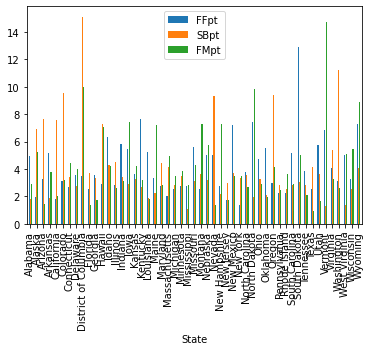

In [141]:
counts4.plot(kind='bar')

<ipython-input-153-2dd63053f0fe>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


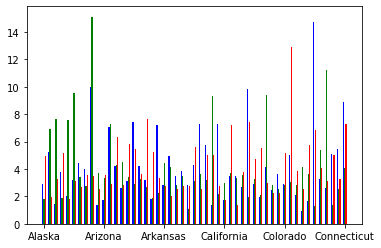

In [153]:
labels = counts2['State']
fm = counts2['FMpt']
sb = counts2['SBpt']
ff = counts2['FFpt']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


ax = plt.subplot(111)
ax.bar(x-0.2, fm, width=0.2, color='b', align='center')
ax.bar(x, sb, width=0.2, color='g', align='center')
ax.bar(x+0.2, ff, width=0.2, color='r', align='center')
ax.set_xticklabels(labels)

plt.show()

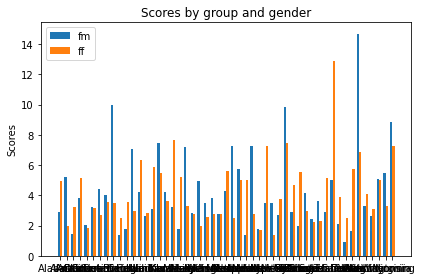

In [147]:
labels = counts2['State']
fm = counts2['FMpt']
sb = counts2['SBpt']
ff = counts2['FFpt']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fm, width, label='fm')
rects2 = ax.bar(x + width/2, ff, width, label='ff')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()




fig.tight_layout()

plt.show()

In [158]:
length = len(counts2)
length

51

In [159]:
x_labels = counts2['State']
x_labels

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

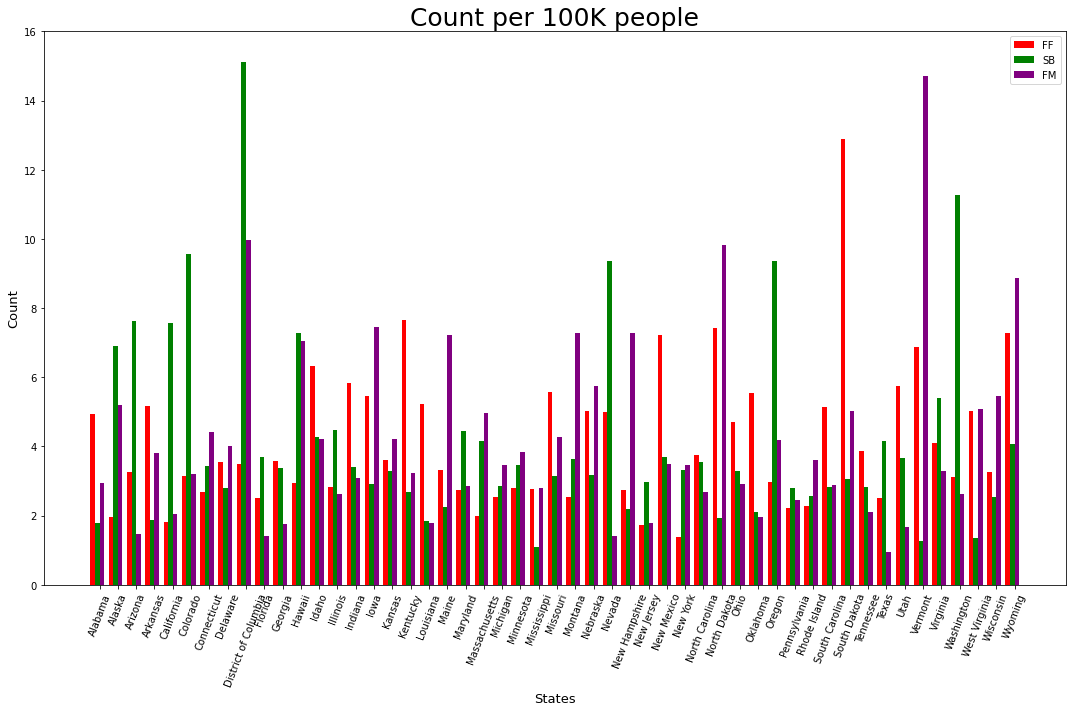

In [197]:
length = len(counts2)
x_labels = counts2['State']


# Set plot parameters
fig, ax = plt.subplots(figsize=(15, 10))
width = 0.25 # width of bar
x = np.arange(length)

ax.bar(x, counts2['FFpt'], width, color='red', label='FF')
ax.bar(x + width, counts2['SBpt'], width, color='green', label='SB')
ax.bar(x + (2 * width), counts2['FMpt'], width, color='purple', label='FM')


ax.set_ylabel('Metric')
ax.set_ylim(0,16)
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
#ax.set_xlabel('Scenario')
ax.set_title('Title')
ax.legend()
plt.xticks(rotation=69)
# Set labels for axes
plt.xlabel("States",fontsize = 13)
plt.ylabel("Count",fontsize = 13)
plt.title("Count per 100K people",fontsize=25,ha='center')
plt.tight_layout()

plt.savefig("./Counts1.png",facecolor='w')
# plt.savefig("../Images/Mice.png", bbox_inches = "tight")
plt.show()
#plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)



In [160]:
counts2[:,0]

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [36]:
uscities1 = uscities
uscities1["State.County"] = uscities["state_name"] + "-"+uscities["county_name"]

duplicate_rows = uscities1[uscities1.duplicated(["State.County"],keep=False)]
#duplicate_rows

uscities1["State.County"].value_counts()

New York-Suffolk             142
California-Los Angeles       140
New York-Nassau              132
Illinois-Cook                122
Pennsylvania-Allegheny       102
                            ... 
New York-Queens                1
North Carolina-Pasquotank      1
Texas-Mason                    1
Texas-McMullen                 1
Nebraska-Grant                 1
Name: State.County, Length: 3203, dtype: int64

In [32]:
fastfooddata = "./FastFoodRestaurants.csv"
fastfood = pd.read_csv(fastfooddata)
fastfood.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [33]:
fastfood["name"].value_counts()

McDonald's                                             1886
Burger King                                            1154
Taco Bell                                               873
Wendy's                                                 731
Arby's                                                  518
                                                       ... 
Hotdoks                                                   1
Charley's Grilled Subs                                    1
Cousins Subs of Green Bay - Oneida St. & Ramada Way       1
Sheetz                                                    1
The Break Away Sports Cafe                                1
Name: name, Length: 548, dtype: int64

In [7]:
county_df.head()

,number,county,State,per capita income,median household income,median family income,population,number of households
0,1,New York County,New York,"$62,498","$69,659","$84,627","1,605,272","736,192"
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020"
3,4,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912"
4,5,Alexandria City,Virginia,"$54,608","$85,706","$107,511","143,684","65,369"


In [10]:
county_census_tract = "./acs2017_census_tract_data.csv" 
county_census = "./acs2017_county_data.csv" 
county_census1 = pd.read_csv(county_census)
county_censust = pd.read_csv(county_census_tract)

In [13]:
county_censust

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


In [30]:
counties = county_census1['County']

duplicate_rows = county_census1[county_census1.duplicated(["State","County"],keep=False)]

#county_census1["County"].value_counts()


county_census2 = county_census1
county_census2["State.County"] = county_census1["State"] + "-"+county_census1["County"]

duplicate_rows = county_census2[county_census2.duplicated(["State.County"],keep=False)]
duplicate_rows

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State.County


In [ ]:
uc

In [40]:
county_census2["State.County"].value_counts()

Virginia-Danville city         1
Indiana-Monroe County          1
Indiana-Wells County           1
Alabama-Etowah County          1
Wisconsin-Calumet County       1
                              ..
Missouri-Franklin County       1
South Dakota-Jackson County    1
Illinois-Jefferson County      1
Montana-Dawson County          1
Maine-Somerset County          1
Name: State.County, Length: 3220, dtype: int64

In [5]:
desert_df.columns[50]

'laomultirhalfshare'

# Farmers Market Data Overview / Cleaning

In [14]:
farmers_df.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/2017 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/2017 17:15
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,Pickens,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38


In [275]:
farmers_df.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [121]:
farmers_df

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/2017 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/2017 17:15
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,Pickens,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,1004767,Zia Bernalillo Farmers' Market,http://www.eatfreshnm.org/,https://www.facebook.com/farmersmarketsnm?ref=hl,NaN,NaN,NaN,335 S. Camino del Pueblo,Bernalillo,Sandoval,...,N,Y,Y,N,N,N,N,N,N,6/5/2014 14:40
8800,1018362,Zimmerman Farmers' Market,http://Pzfarmersmarket.org,Princeton-zimmerman farmers market,NaN,NaN,NaN,25850 Main Street,Zimmerman,Sherburne,...,N,N,Y,N,N,N,N,N,N,6/22/2017 19:37
8801,1012380,Zion Canyon Farmers Market,http://zionharvest.org,https://www.facebook.com/ZionCanyonFarmersMarket/,NaN,NaN,NaN,1212 Zion Park Blvd.,Springdale,Washington,...,Y,N,Y,N,N,Y,N,N,N,7/9/2016 17:00
8802,1004686,Zionsville Farmers Market,http://www.zionsvillefarmersmarket.org,NaN,NaN,NaN,NaN,Hawthorne & Main Street,Zionsville,Boone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009


In [38]:
county_df = county_df.rename(columns={"county":"County"})
county_df.head()

,number,County,State,per capita income,median household income,median family income,population,number of households
0,1,New York County,New York,"$62,498","$69,659","$84,627","1,605,272","736,192"
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020"
3,4,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912"
4,5,Alexandria City,Virginia,"$54,608","$85,706","$107,511","143,684","65,369"


In [7]:
farmers_df.columns

Index(['FMID', 'MarketName', 'Website', 'Facebook', 'Twitter', 'Youtube',
       'OtherMedia', 'street', 'city', 'County', 'State', 'zip', 'Season1Date',
       'Season1Time', 'Season2Date', 'Season2Time', 'Season3Date',
       'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y', 'Location',
       'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic', 'Bakedgoods',
       'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs', 'Vegetables',
       'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts', 'Plants',
       'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans',
       'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime'],
      dtype='object')

In [8]:
farmers_access_df = farmers_df.loc[:,['MarketName','city', 'County', 'State',
                                      'WIC', 'WICcash', 'SFMNP','SNAP']]
farmers_access_df.head()

,MarketName,city,County,State,WIC,WICcash,SFMNP,SNAP
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,Y,N,Y,N
1,Stearns Homestead Farmers' Market,Parma,Cuyahoga,Ohio,N,N,Y,N
2,106 S. Main Street Farmers Market,Six Mile,Pickens,South Carolina,N,N,N,N
3,10th Steet Community Farmers Market,Lamar,Barton,Missouri,N,N,N,N
4,112st Madison Avenue,New York,New York,New York,N,Y,Y,N


In [97]:
access_df = pd.merge(farmers_access_df,county_df, how = "outer",on = "County")
access_df = access_df[access_df.MarketName.notnull()]
cleaned_access = access_df.drop_duplicates("MarketName").reset_index()
cleaned_access = cleaned_access[["MarketName","city","County","State_x","WIC","WICcash","SFMNP","per capita income","median household income","median family income","population","number of households"]]
cleaned_access = cleaned_access.rename(columns={
    "city":"City",
    "State_x":"State",
    "per capita income": "Income Per Capita",
    "median household income": "Median Household Income",
    "median family income": "Median Family Income",
    "population":"Population",
    "number of households":"Number of Households"
})
cleaned_access = cleaned_access[cleaned_access.Population.notnull()]
cleaned_access = cleaned_access[cleaned_access["Income Per Capita"].notnull()]
cleaned_access["Income Per Capita"]= cleaned_access["Income Per Capita"].str.replace(',', '').str.replace('$','').astype(int)
cleaned_access["Median Household Income"]= cleaned_access["Median Household Income"].str.replace(',', '').str.replace('$','').astype(int)
cleaned_access["Median Family Income"]= cleaned_access["Median Family Income"].str.replace(',', '').str.replace('$','').astype(int)
cleaned_access["Population"]= cleaned_access["Population"].str.replace(',', '').astype(int)
cleaned_access["Number of Households"]= cleaned_access["Number of Households"].str.replace(',', '').astype(int)
cleaned_access.head()

,MarketName,City,County,State,WIC,WICcash,SFMNP,Income Per Capita,Median Household Income,Median Family Income,Population,Number of Households
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,Y,N,Y,23584,45395,54941,31157,12491
1,Caledonia Farmers Market Association - Saturday,St. Johnsbury,Caledonia,Vermont,Y,N,Y,23584,45395,54941,31157,12491
2,Caledonia Farmers Market Association - Winter,St. Johnsbury,Caledonia,Vermont,N,N,N,23584,45395,54941,31157,12491
3,Groton Growers Farmers' Market,Groton,Caledonia,Vermont,Y,N,Y,23584,45395,54941,31157,12491
4,Hardwick Farmers' Market,Hardwick,Caledonia,Vermont,Y,Y,Y,23584,45395,54941,31157,12491


In [182]:
cleaned_access_income = round(cleaned_access.groupby("State").mean(),2)
cleaned_access_income = cleaned_access_income[["Income Per Capita"]].reset_index()
cleaned_access_income.head()

,State,Income Per Capita
0,Alabama,28138.94
1,Alaska,33145.07
2,Arizona,25615.11
3,Arkansas,25940.38
4,California,30828.51


In [144]:
cleaned_states = cleaned_access.groupby("State").count().reset_index()
cleaned_states = cleaned_states[["State","MarketName"]]
cleaned_states.head()

,State,MarketName
0,Alabama,125
1,Alaska,29
2,Arizona,87
3,Arkansas,87
4,California,717


# No Food Assistance Programs

In [215]:
support_none_df = cleaned_access.loc[(cleaned_access["WIC"] == "N") & 
                   (cleaned_access ["WICcash"] == "N") &
                   (cleaned_access ["SFMNP"] == "N"),:]
support_none_df.head()

,MarketName,City,County,State,WIC,WICcash,SFMNP,Income Per Capita,Median Household Income,Median Family Income,Population,Number of Households
2,Caledonia Farmers Market Association - Winter,St. Johnsbury,Caledonia,Vermont,N,N,N,23584,45395,54941,31157,12491
6,Lyndonville Farmers' Market,Lyndonville,Caledonia,Vermont,N,N,N,23584,45395,54941,31157,12491
7,Peacham Farmers Market,Peacham,Caledonia,Vermont,N,N,N,23584,45395,54941,31157,12491
10,Case Western Reserve University Farmers Market,Cleveland,Cuyahoga,Ohio,N,N,N,27423,43804,59745,1272533,534476
11,Coventry Village Farmers Market,Cleveland Hts,Cuyahoga,Ohio,N,N,N,27423,43804,59745,1272533,534476


In [277]:
none_states = support_none_df.groupby("State").count().reset_index()
none_states = none_states[["State","MarketName"]]
none_states.head()

,State,MarketName
0,Alabama,61
1,Alaska,14
2,Arizona,47
3,Arkansas,62
4,California,340


# All 3 Food Assistance Programs

In [217]:
support_all_df = cleaned_access.loc[(cleaned_access["WIC"] == "Y") & 
                   (cleaned_access ["WICcash"] == "Y") &
                   (cleaned_access ["SFMNP"] == "Y"),:]
support_all_df.head()

,MarketName,City,County,State,WIC,WICcash,SFMNP,Income Per Capita,Median Household Income,Median Family Income,Population,Number of Households
4,Hardwick Farmers' Market,Hardwick,Caledonia,Vermont,Y,Y,Y,23584,45395,54941,31157,12491
12,Downtown Cleveland Farmers Market,Cleveland,Cuyahoga,Ohio,Y,Y,Y,27423,43804,59745,1272533,534476
16,Gateway105 Farmers' Market,Cleveland,Cuyahoga,Ohio,Y,Y,Y,27423,43804,59745,1272533,534476
18,Gordon SQ. Market,Cleveland,Cuyahoga,Ohio,Y,Y,Y,27423,43804,59745,1272533,534476
20,Lakewood Earth and Food (LEAF) Community Farme...,Lakewood,Cuyahoga,Ohio,Y,Y,Y,27423,43804,59745,1272533,534476


In [146]:
all_states = support_all_df.groupby("State").count().reset_index()
all_states = all_states[["State","MarketName"]]
all_states.head()

,State,MarketName
0,Alabama,4
1,Alaska,5
2,Arizona,28
3,Arkansas,5
4,California,120


# At Least 1 of 3 Food Assistance Programs

In [218]:
support_some_df = cleaned_access.loc[(cleaned_access["WIC"] == "Y") | 
                   (cleaned_access ["WICcash"] == "Y") |
                   (cleaned_access ["SFMNP"] == "Y"),:]

In [219]:
some_states = support_some_df.groupby("State").count().reset_index()
some_states = some_states[["State","MarketName"]]
some_states.head()

,State,MarketName
0,Alabama,64
1,Alaska,15
2,Arizona,40
3,Arkansas,25
4,California,377


# Farmers Market Analysis

In [243]:
print(f"Of the {len(cleaned_access)} farmers markets we have noted, {len(support_none_df)} do not have any food assistance programs, {len(support_all_df)} has all three noted food assistance programs and {len(support_some_df)} has at least one of the three food assistance programs available.")

Of the 7682 farmers markets we have noted, 4637 do not have any food assistance programs, 832 has all three noted food assistance programs and 3045 has at least one of the three food assistance programs available.


In [199]:
food_assistance_count = pd.merge(cleaned_states,none_states, how = "outer", on ="State")
food_assistance_count = food_assistance_count.rename(columns={
    "MarketName_x":"Total Markets",
    "MarketName_y": "No Programs"
})
food_assistance_count = pd.merge(food_assistance_count,all_states,how = "outer", on ="State" )
food_assistance_count = food_assistance_count.rename(columns={
    "MarketName":"All Programs",
})
food_assistance_count = pd.merge(food_assistance_count,some_states,how = "outer", on ="State" )
food_assistance_count = food_assistance_count.rename(columns={
    "MarketName":"One or More Program(s)",
})
# df['DataFrame Column'] = 
food_assistance_count["All Programs"] = food_assistance_count["All Programs"].fillna(0).astype(int)
food_assistance_count["One or More Program(s)"] = food_assistance_count["One or More Program(s)"].fillna(0).astype(int)
food_assistance_count = pd.merge(food_assistance_count,cleaned_access_income,how = "outer", on ="State" )
food_assistance_count = food_assistance_count[["State","All Programs","One or More Program(s)","No Programs","Total Markets","Income Per Capita"]]
food_assistance_count["All Program %"] = round((food_assistance_count["All Programs"]/food_assistance_count["Total Markets"])*100,2)
food_assistance_count["FA Program %"] = round((food_assistance_count["One or More Program(s)"]/food_assistance_count["Total Markets"])*100,2)
food_assistance_count["No Program %"] = round((food_assistance_count["No Programs"]/food_assistance_count["Total Markets"])*100,2)
food_assistance_count

,State,All Programs,One or More Program(s),No Programs,Total Markets,Income Per Capita,All Program %,FA Program %,No Program %
0,Alabama,4,64,61,125,28138.94,3.20,51.20,48.80
1,Alaska,5,15,14,29,33145.07,17.24,51.72,48.28
2,Arizona,28,40,47,87,25615.11,32.18,45.98,54.02
3,Arkansas,5,25,62,87,25940.38,5.75,28.74,71.26
4,California,120,377,340,717,30828.51,16.74,52.58,47.42
5,Colorado,1,12,138,150,31238.66,0.67,8.00,92.00
6,Connecticut,14,46,95,141,37396.48,9.93,32.62,67.38
7,Delaware,0,6,26,32,34740.00,0.00,18.75,81.25
8,Florida,5,27,223,250,28111.49,2.00,10.80,89.20
9,Georgia,3,17,136,153,28175.46,1.96,11.11,88.89


## Farmers Markets with Food Assistance Programs Available by State

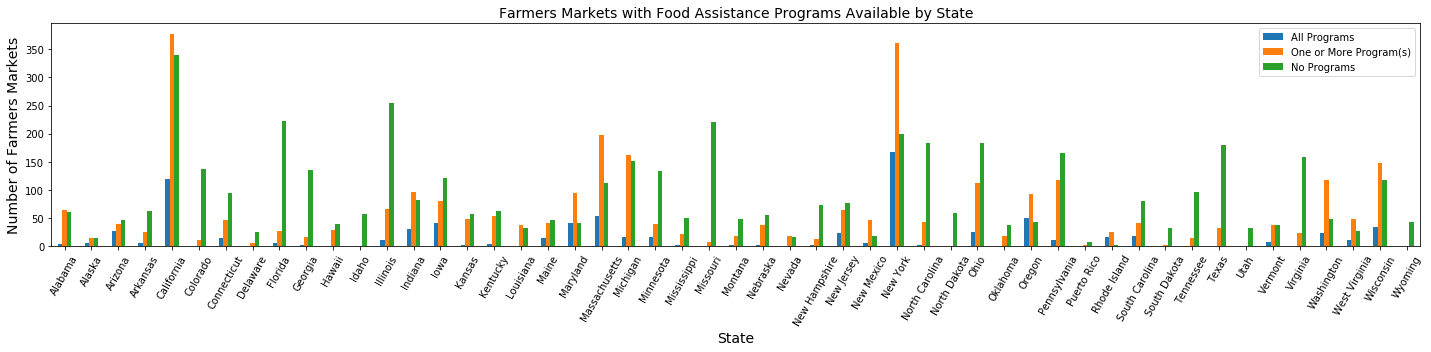

In [257]:
food_assistance_sort = food_assistance_count[["State","All Programs","One or More Program(s)","No Programs"]]
food_assistance_plot = food_assistance_sort.plot(kind="bar", figsize=(20,5))
food_assistance_plot.set_xticklabels(food_assistance_sort["State"], rotation=60)
plt.title("Farmers Markets with Food Assistance Programs Available by State",size= 14)
plt.xlabel("State",size= 14)
plt.ylabel("Number of Farmers Markets",size= 14)
plt.tight_layout()
plt.savefig("./Priya's Resources/Farmers Markets with Food Assistance Programs.png")
plt.show()


In [279]:
no_assistance_count = food_assistance_count.loc[food_assistance_count["No Program %"] > 50,["State","Income Per Capita","All Program %","FA Program %","No Program %"]]
no_assistance_count

,State,Income Per Capita,All Program %,FA Program %,No Program %
2,Arizona,25615.11,32.18,45.98,54.02
3,Arkansas,25940.38,5.75,28.74,71.26
5,Colorado,31238.66,0.67,8.00,92.00
6,Connecticut,37396.48,9.93,32.62,67.38
7,Delaware,34740.00,0.00,18.75,81.25
8,Florida,28111.49,2.00,10.80,89.20
9,Georgia,28175.46,1.96,11.11,88.89
10,Hawaii,29246.71,0.00,42.65,57.35
11,Idaho,24286.97,0.00,1.72,98.28
12,Illinois,31299.72,3.44,20.62,79.38


In [278]:
some_assistance_count = food_assistance_count.loc[food_assistance_count["FA Program %"] > 50,["State","Income Per Capita","All Program %","FA Program %","No Program %"]]
some_assistance_count

,State,Income Per Capita,All Program %,FA Program %,No Program %
0,Alabama,28138.94,3.20,51.20,48.80
1,Alaska,33145.07,17.24,51.72,48.28
4,California,30828.51,16.74,52.58,47.42
13,Indiana,28187.84,16.67,53.89,46.11
17,Louisiana,25633.96,1.43,52.86,47.14
19,Maryland,35863.81,30.88,69.12,30.88
20,Massachusetts,36065.93,17.10,63.55,36.45
21,Michigan,26552.90,5.40,51.75,48.25
27,Nevada,29843.14,2.86,51.43,48.57
30,New Mexico,25855.08,9.23,70.77,29.23


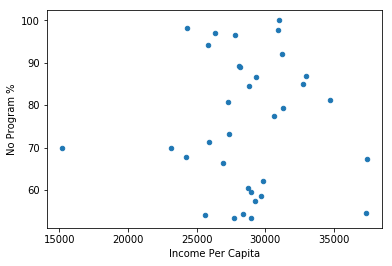

In [264]:
no_assistance_count.plot(kind = "scatter", x = "Income Per Capita",y = "No Program %")
# plt.figure(figsize =(20,5))
# plt.xticks(rotation=60)
plt.show()

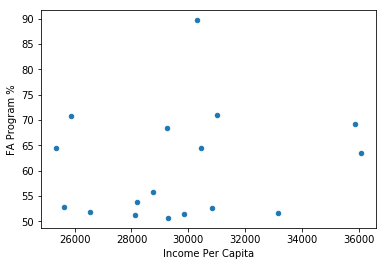

In [271]:
some_assistance_count.plot(kind = "scatter", x = "Income Per Capita",y = "FA Program %")
plt.show()

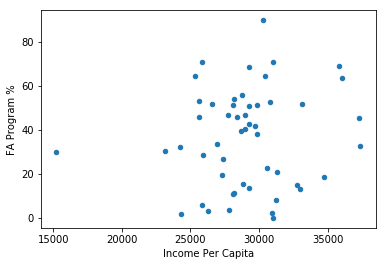

In [273]:
food_assistance_count.plot(kind = "scatter", x = "Income Per Capita",y = "FA Program %")

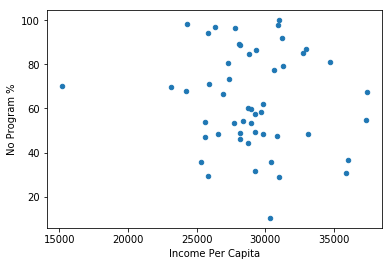

In [274]:
food_assistance_count.plot(kind = "scatter", x = "Income Per Capita",y = "No Program %")

37396.48
15210.7


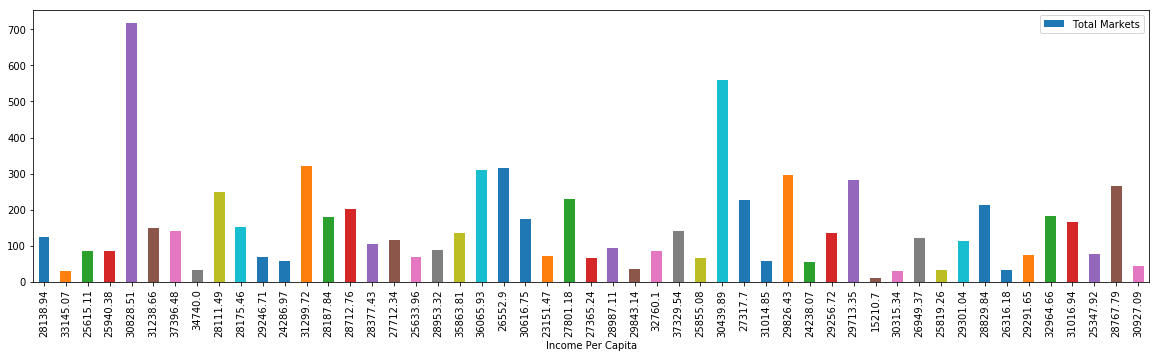

In [287]:
food_assistance_count.plot(kind = "bar", x = "Income Per Capita",y = "Total Markets",figsize=(20,5))
print(f"{food_assistance_count['Income Per Capita'].max()}")
print(f"{food_assistance_count['Income Per Capita'].min()}")